# Maching Learning Homework 3
## Part II: Programming Exercises

### Submission by:  
Akshay Tambe (apt321@nyu.edu)  
Snahil Singh (ss11381@nyu.edu)

***Solutions for Questions: 2(a), 2(b), 2(c), 3(a), 3(b) involves manual calculations which are present in apt321_ss11381_ML_HW3_Part2_Answers.pdf***

## Question 2(d)
Finding eigenvalues and eigenvectors of given:
$$
Matrix A =
\left(\begin{array}{cc} 
0 & 14\\
6 & 9
\end{array}\right)
$$ 

In [1]:
import numpy as np
from numpy import linalg

A = np.array([[0, 14], [6, 9]])
v, d = linalg.eig(A)

print("Eigen values are: ", v)
print("\nEigen vectors are:")
print(d)

Eigen values are:  [-5.71028893 14.71028893]

Eigen vectors are:
[[-0.9259401  -0.6894021 ]
 [ 0.37767039 -0.72437887]]


## Question 3(c)
Use the Python command `np.cov(B)` to produce the sample covariance matrix of X.  
What is the largest eigenvalue of the sample covariance matrix of B?

In [2]:
# Matrix B calculated in Question 3(a)
B = np.array([[-0.75,-1.5,0.5], [3.25,2.5,0.5], [1.25,-2.5,-3.5], [-3.75,1.5,2.5]])
print("Matrix B:")
print(B)

# Calculating Covariance of Matrix B
Cov_B = np.cov(B, rowvar=False)
print("\nCovariance of Matrix B:")
print(Cov_B)

# Largest eigenvalue of the sample covariance matrix of B
v, d = linalg.eig(Cov_B)
print("\nEigen values of the sample covariance matrix of B are: ", v)
print("\nLargest eigenvalue of the sample covariance matrix of B: ",max(v))

Matrix B:
[[-0.75 -1.5   0.5 ]
 [ 3.25  2.5   0.5 ]
 [ 1.25 -2.5  -3.5 ]
 [-3.75  1.5   2.5 ]]

Covariance of Matrix B:
[[ 8.91666667  0.16666667 -4.16666667]
 [ 0.16666667  5.66666667  4.33333333]
 [-4.16666667  4.33333333  6.33333333]]

Eigen values of the sample covariance matrix of B are:  [ 0.49703343 12.97881887  7.44081437]

Largest eigenvalue of the sample covariance matrix of B:  12.978818870145858


## Question 3(d)
Perform PCA on Matrix B

In [3]:
import sklearn.decomposition as skd
import numpy as np
# .fit computes the principal components (n_components of them)
# The columns of W are the eigenvectors of the covariance matrix of X

pca = skd.PCA(n_components = 3)
skd.PCA.fit(pca,B)
W1 = pca.components_
W = W1.transpose()
Z = pca.transform(B)

print("Matrix Z:")
print(Z)

print("\nShowing the first two columns of Z:")
print(Z.T[:2].T)

Matrix Z:
[[ 0.26018674 -1.41900435  0.99057029]
 [-0.87353472  4.03721245  0.01878129]
 [-4.04749635 -1.8486773  -0.51250906]
 [ 4.66084433 -0.7695308  -0.49684253]]

Showing the first two columns of Z:
[[ 0.26018674 -1.41900435]
 [-0.87353472  4.03721245]
 [-4.04749635 -1.8486773 ]
 [ 4.66084433 -0.7695308 ]]


## Performing PCA on image data
The code below loads a dataset containing images of faces and displays some of them. 
You will need to run the code to answer the given questions. (You may need to install pillow or something similar.)  
Each image is a 62x47 pixel array. The images are read into a matrix called fea. The rows of the matrix fea are the images (examples).  
The features (columns) are the pixels. Each example is represented by a vector of real numbers of length 2914, listing the pixels from left to right, row by row, from top to bottom.

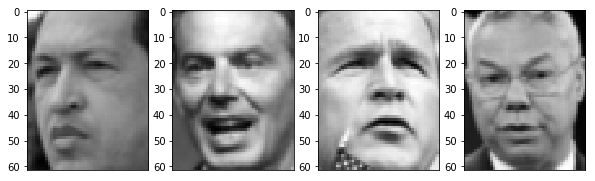

In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_lfw_people

lfw_people = fetch_lfw_people(min_faces_per_person=70)
n_samples, h, w = lfw_people.images.shape
npix = h*w
fea = lfw_people.data

def plt_face(x):
    global h,w
    plt.imshow(x.reshape((h, w)), cmap=plt.cm.gray)
    plt.xticks([])
    
plt.figure(figsize=(10,20))
nplt = 4

for i in range(nplt):
    plt.subplot(1,nplt,i+1)
    plt_face(fea[i])
plt.show()

## Question 5(a)
Display the fourth face in the dataset using the appropriate command above. Print the resulting display.

In [5]:
# Selecting 4th Image from fea
plt_face(fea[3])
plt.show()

## Question 5(b)
Compute the mean of all the examples in the dataset fea. (That is, compute an image such that each pixel i of the image is the mean of pixel i in all the images in fea.)  
Display it using a modification of the above
command.  
Give the Python commands you used and show the resulting display.

In [6]:
# Calculating Mean Image
plt_face(np.average(fea, axis=0))
plt.show()

## Question 5(c)
Let’s do dimensionality reduction with pca. Using Python, compute the 5 top principal components of the data matrix fea. Give the Python commands you used. What are the values of the associated 5 attributes of the fourth image in the dataset?

In [7]:
# .fit computes the principal components (n_components of them)
# The columns of W are the eigenvectors of the covariance matrix of X
# Number of Components = 5
pca = skd.PCA(n_components = 5)
skd.PCA.fit(pca,fea)

W1 = pca.components_
W = W1.transpose()
Z = pca.transform(fea)

print("Z:\n", Z[3])

Z:
 [ 202.54233  -261.47693   418.97388   -29.399635   39.78523 ]


## Question 5(d)
Using the reconstruction equation X = W<sup>T</sup>Z + M described above, but with just the first 5 columns of Z and W (the attributes associated with the first 5 principal components), approximate the fourth image in the dataset.  
Give the Python commands you used.  
Display the resulting approximate image and print the resulting display.  
Repeat with the first 50 columns of Z and W.  
(These are representations of the fourth image, based on 5 or 50 features instead of the original 2914 pixel features.)

In [8]:
# .fit computes the principal components (n_components of them)
# The columns of W are the eigenvectors of the covariance matrix of X
# Number of Components = 5
pca = skd.PCA(n_components = 5)
skd.PCA.fit(pca,fea)
W1 = pca.components_
W = W1.transpose()
Z = pca.transform(fea)

# Reconstructing Image 4 with Number of Components = 5 
reconstruct_image_4 = (W.dot(Z[3]) + np.average(fea, axis=0)).reshape((h,w))
plt.imshow(reconstruct_image_4, cmap=plt.cm.gray)
plt.show()

In [9]:
# .fit computes the principal components (n_components of them)
# The columns of W are the eigenvectors of the covariance matrix of X
# Number of Components = 50
pca = skd.PCA(n_components = 50)
skd.PCA.fit(pca,fea)
W1 = pca.components_
W = W1.transpose()
Z = pca.transform(fea)

# Reconstructing Image 4 with Number of Components = 50
reconstruct_image_4 = (W.dot(Z[3]) + np.average(fea, axis=0)).reshape((h,w))
plt.imshow(reconstruct_image_4, cmap=plt.cm.gray)
plt.show()